## Step 1: Data Preprocessing


In [10]:
# Load the dataset and convert the 'Date' column to datetime
import numpy as np
import pandas as pd
df = pd.read_csv('TCS.csv')

# Use the correct date format for your dataset ("%Y-%m-%d")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values(by='Date', ascending=True)

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if necessary)
df.fillna(0, inplace=True)

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64


## Step 2: Feature Selection/Engineering


In [11]:
# Select 'Date' and 'Close' columns as features
features = df[['Date', 'Close']]

## Step 3: Data Splitting

In [12]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_size = 0.8
train, test = train_test_split(features, train_size=train_size, shuffle=False)

## Step 4: Data Normalization

In [13]:
# Normalize the 'Close' column using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train[['Close']] = scaler.fit_transform(train[['Close']])
test[['Close']] = scaler.transform(test[['Close']])

## Step 5: Model Building (LSTM)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

## Step 6: Training the Model

In [15]:
# Prepare data for training
X_train = train['Close'][:-1].values.reshape(-1, 1, 1)
y_train = train['Close'][1:].values

# Prepare data for training
X_train = train['Close'][:-1].values.reshape(-1, 1, 1)
y_train = train['Close'][1:].values

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
3310/3310 [==============================] - 11s 3ms/step - loss: 0.0064
Epoch 2/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.6366e-04
Epoch 3/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.4135e-04
Epoch 4/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.4190e-04
Epoch 5/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.4582e-04
Epoch 6/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.4873e-04
Epoch 7/10
3310/3310 [==============================] - 10s 3ms/step - loss: 2.3288e-04
Epoch 8/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.3844e-04
Epoch 9/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.4077e-04
Epoch 10/10
3310/3310 [==============================] - 9s 3ms/step - loss: 2.3773e-04


## Step 7: Model Evaluation and Visualization

26/26 [==============================] - 1s 2ms/step


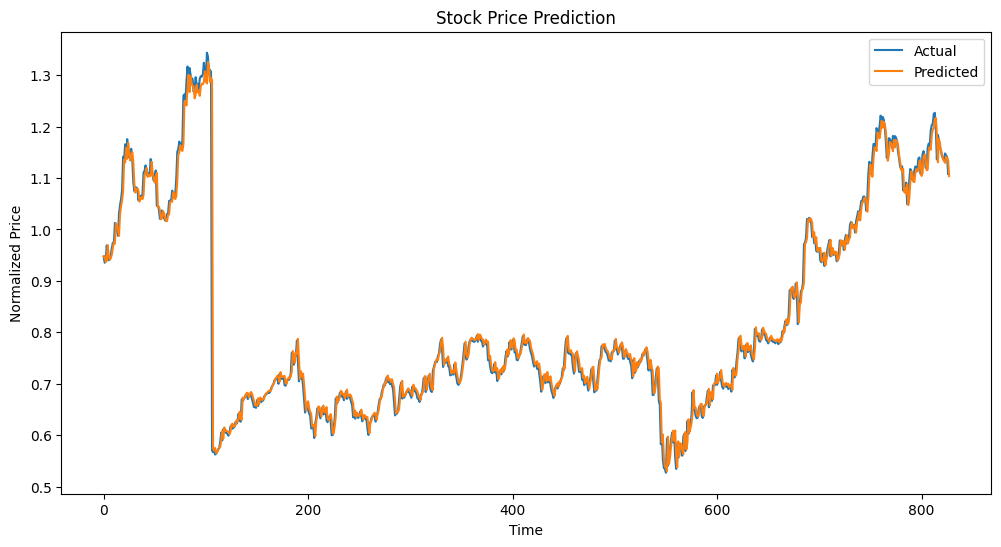

In [16]:
# Prepare data for testing
X_test = test['Close'].values.reshape(-1, 1, 1)
y_test = test['Close'].shift(-1).dropna().values

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Plot the actual vs. predicted stock prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.show()